In [1]:
%load_ext autoreload

In [2]:
from analysis.analyze_results import *
from pathlib import Path
import matplotlib

In [3]:
# output_base_folder = Path("/Users/che/iarai/work/logs/storage_benchmarking")
# output_base_folder = Path("/iarai/work/logs/storage_benchmarking")
output_base_folder = Path("/home/ivan/temp/temp-benchmarking")
# output_base_folder = Path("/home/ivan/Documents/git/storage-benchmarking/src/benchmark_output")


## Dataloader benchmark

**parameters**

| param | range |
| --- | --- |
| batch_pool_size | 2, 4, 8, 16, 32, 64 | 
| num_fetch_workers | 2, 4, 8, 16, 32, 64, 128 | 
| fetch_impl | asyncio, threaded |
| dataset | s3,scratch |


**parameters explained**

| param | implementation | details | 
| --- | --- | --- |
| batch_pool_size | asyncio | Unused |
|  | threaded | Number of batches to fetch in parallel (normally, one batch is fetched, and items are downloaded (sequentiall or in parallel). This implementation takes N batches, and starts downloading items in parallel. Individual items are yielded and once a full batch is collected it is yielded.)|
| num_fetch_workers | asyncio | ThreadPoolExecutor argument for the maximum number of threads that can be used to execute the given calls. Also, the number of tasks initiall placed into the task (worker) queue.  |
|  | threaded | ThreadPoolExecutor argument for the maximum number of threads that can be used to execute the given calls |

In [4]:
group_by_dataloader = ["dataset",  "num_fetch_workers", "num_workers", "batch_pool"]

In [212]:
df_dataloader = extract_pandas(output_base_folder, folder_filter="fetcher_impl_6/*benchmark_dataloader_s3*")

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 17.65it/s]


Let's visualize the timeline of dataloading, a new color for each thread (cycle 8)

In [213]:
df_dataloader_zeroworkers_th=df_dataloader[df_dataloader["num_workers"]==0]
df_dataloader_zeroworkers_th=df_dataloader_zeroworkers_th[df_dataloader_zeroworkers_th["fetch_impl"]=="threaded"]

In [214]:
display(get_run_stats(df_dataloader_zeroworkers_th, group_by=group_by_dataloader))

downloaded data [B]  \
dataset num_fetch_workers num_workers batch_pool run                                                                       
s3      2                 0           10         20210929f214247_benchmark_dataloader_s3_128_0_2...         1.342530e+09   
        4                 0           10         20210929f214904_benchmark_dataloader_s3_128_0_4...         1.356247e+09   
        8                 0           10         20210929f215222_benchmark_dataloader_s3_128_0_8...         1.356247e+09   
        16                0           10         20210929f215411_benchmark_dataloader_s3_128_0_1...         1.356247e+09   
        32                0           10         20210929f215524_benchmark_dataloader_s3_128_0_3...         1.356247e+09   
        64                0           10         20210929f215644_benchmark_dataloader_s3_128_0_6...         1.356247e+09   
        128               0           10         20210929f215810_benchmark_dataloader_s3_128_0_1...         1.356247e+09   

                                                                                                       time_start  \
dataset num_fetch_workers num_workers batch_pool run                                                                
s3      2                 0           10         20210929f214247_benchmark_dataloader_s3_128_0_2...  1.632945e+09   
        4                 0           10         20210929f214904_benchmark_dataloader_s3_128_0_4...  1.632945e+09   
        8                 0           10         20210929f215222_benchmark_dataloader_s3_128_0_8...  1.632945e+09   
        16                0           10         20210929f215411_benchmark_dataloader_s3_128_0_1...  1.632945e+09   
        32                0           10         20210929f215524_benchmark_dataloader_s3_128_0_3...  1.632945e+09   
        64                0           10         20210929f215644_benchmark_dataloader_s3_128_0_6...  1.632945e+09   
        128               0           10         20210929f215810_benchmark_dataloader_s3_128_0_1...  1.632945e+09   

                                                                                                         time_end  \
dataset num_fetch_workers num_workers batch_pool run                                                                
s3      2                 0           10         20210929f214247_benchmark_dataloader_s3_128_0_2...  1.632945e+09   
        4                 0           10         20210929f214904_benchmark_dataloader_s3_128_0_4...  1.632945e+09   
        8                 0           10         20210929f215222_benchmark_dataloader_s3_128_0_8...  1.632945e+09   
        16                0           10         20210929f215411_benchmark_dataloader_s3_128_0_1...  1.632945e+09   
        32                0           10         20210929f215524_benchmark_dataloader_s3_128_0_3...  1.632945e+09   
        64                0           10         20210929f215644_benchmark_dataloader_s3_128_0_6...  1.632945e+09   
        128               0           10         20210929f215810_benchmark_dataloader_s3_128_0_1...  1.632946e+09   

                                                                                                     total_elpased_time [s]  \
dataset num_fetch_workers num_workers batch_pool run                                                                          
s3      2                 0           10         20210929f214247_benchmark_dataloader_s3_128_0_2...              374.384508   
        4                 0           10         20210929f214904_benchmark_dataloader_s3_128_0_4...              196.207932   
        8                 0           10         20210929f215222_benchmark_dataloader_s3_128_0_8...              105.740372   
        16                0           10         20210929f215411_benchmark_dataloader_s3_128_0_1...               70.387134   
        32                0           10         20210929f215524_benchmark_dataloader_s3_128_0_3...               

In [21]:
print(df_dataloader_zeroworkers_th.keys())

Index(['trace_name', 'trace_level', 'function_name', 'elapsed', 'time_start',
       'time_end', 'process_time', 'process_time_start', 'process_time_end',
       'pid', 'threading_ident', 'len', 'output_base_folder', 'dataset',
       'batch_size', 'num_workers', 'data_loader_type', 'num_fetch_workers',
       'prefetch_factor', 'repeat', 'num_batches', 'shuffle', 'fetch_impl',
       'batch_pool', 'system', 'node', 'release', 'version', 'machine',
       'source_file', 'run'],
      dtype='object')


### Threaded best run 

In [190]:
import numpy as np
import seaborn as sns
def plot_events_timeline_detailed(df_dataloader, 
                                  color_column: str = "threading_ident", 
                                  cycle=11, 
                                  highlight_thread: int = None,
                                  filter_function: str = None,
                                 ):
    if filter_function is not None:
        df_dataloader=df_dataloader[df_dataloader["function_name"]==filter_function]
    
    color_list = {}
    thread_ids = np.array(list(df_dataloader["threading_ident"]))
    pallete = sns.color_palette(None, len(np.unique(thread_ids)))
    thread_runtimes = {}
    for index, t in enumerate(np.unique(thread_ids)):
        color_list[t] = pallete[index]
        thread_runtimes[t] = max(df_dataloader[df_dataloader["threading_ident"]==t]["time_end"])-min(df_dataloader[df_dataloader["threading_ident"]==t]["time_start"])
    df_dataloader = df_dataloader.sort_values(["pid", "threading_ident", "trace_level", "time_start"],
                                              ascending=[False, False, False, False]).reset_index(drop=True)
    
    min_time = min(df_dataloader["time_start"])
    max_time = max(df_dataloader["time_end"]) - min_time
    
    

    dict_dataloader = df_dataloader.to_dict("index")
    print(len(dict_dataloader.items()))


    colors = []
    lines = []
    texts = []
    for index, t in enumerate(np.unique(thread_ids)):
        last_i = 0
        for i, (_, param_series) in enumerate(dict_dataloader.items()):
            if param_series["threading_ident"] == t:
                last_i = i
                lines.append([(param_series["time_start"] - min_time, i), (param_series["time_end"] - min_time, i)])
                if highlight_thread is not None:
                    if param_series["threading_ident"] == highlight_thread:
                        colors.append("black")
                    else:
                        colors.append("red")
                else:
                    colors.append(color_list[param_series["threading_ident"]])
        lines.append([(0, last_i), (max_time, last_i)])
        texts.append((thread_runtimes[t], 0, last_i))
        colors.append("silver")

    print(f"Lines num: {len(lines)}")

    lc = matplotlib.collections.LineCollection(lines, colors=colors, linewidths=2)
    fig, ax = plt.subplots(figsize=(50, 50))
    ax.add_collection(lc)
    for i in texts:
        ax.text(i[1], i[2], i[0])
    ax.autoscale()
    ax.margins(0.1)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
10496
Lines num: 10541


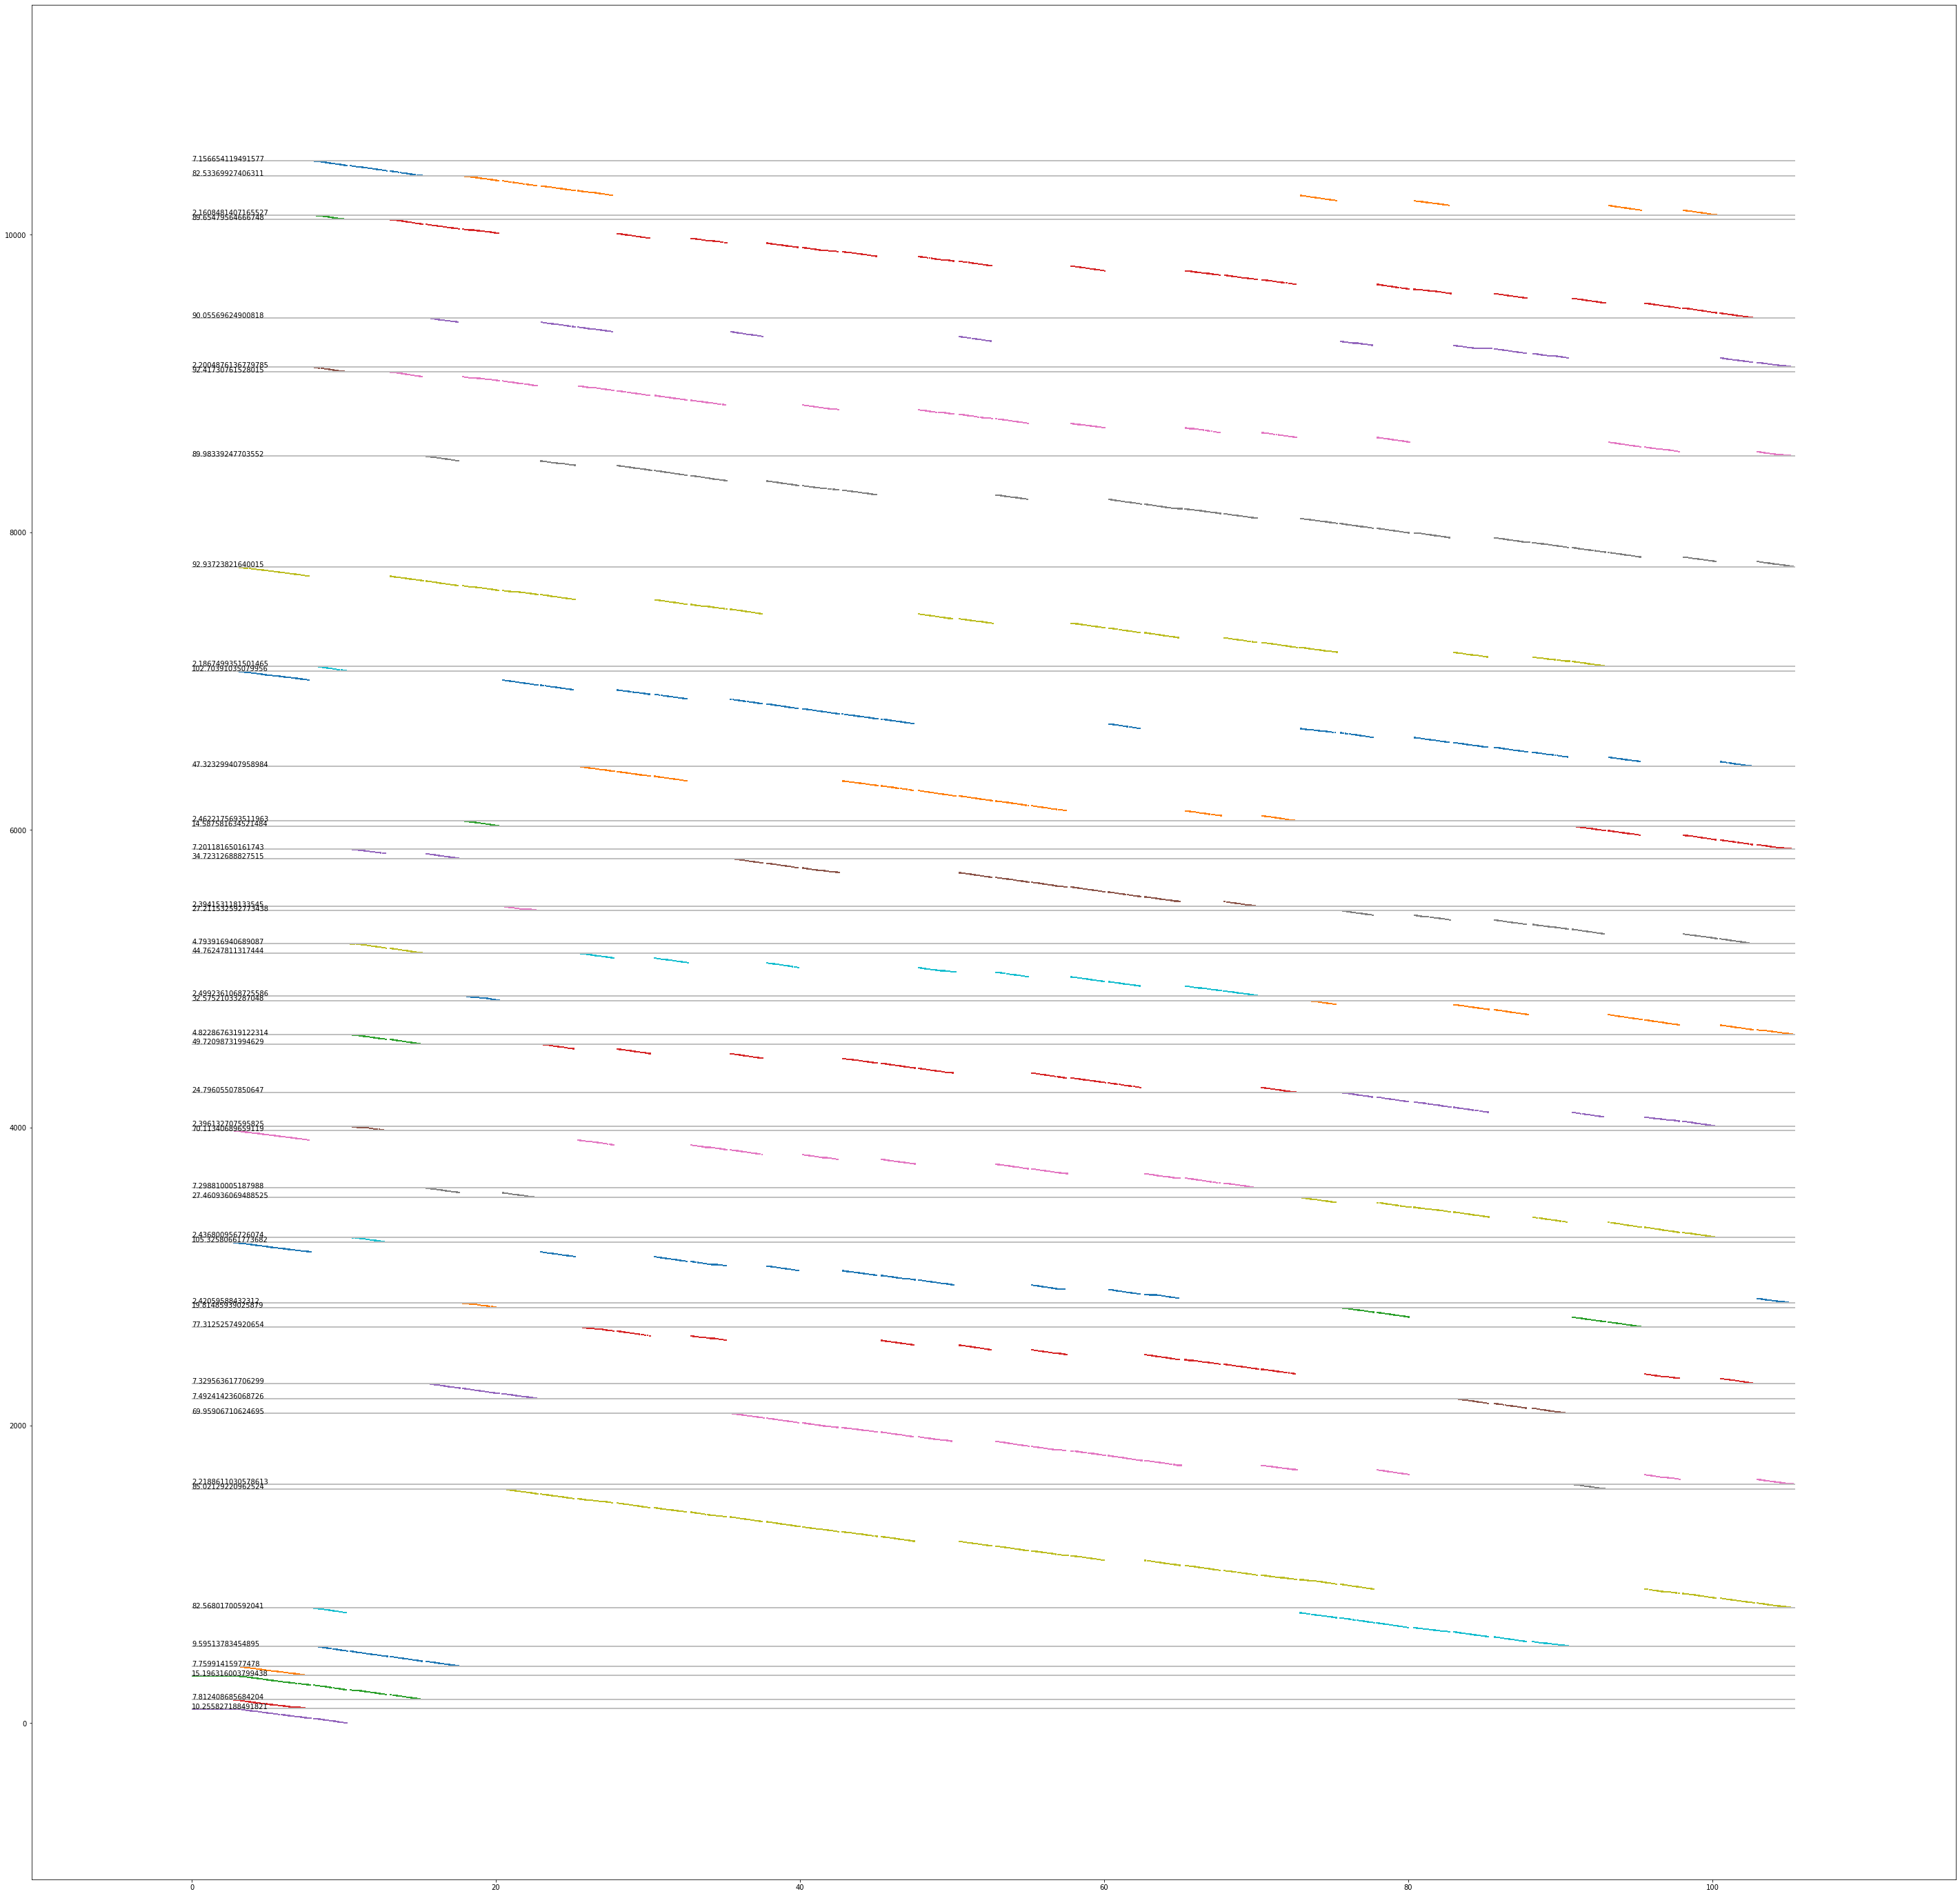

In [191]:
%load_ext autoreload
run = df_dataloader_zeroworkers_th[(df_dataloader_zeroworkers_th["num_fetch_workers"]==8)]["run"].iloc[0]
plot_events_timeline_detailed(df_dataloader_zeroworkers_th[df_dataloader_zeroworkers_th["run"]==run], filter_function="__getitem__")

In [189]:
get_thread_stats(df_dataloader_zeroworkers_th[df_dataloader_zeroworkers_th["run"]==run], group_by=["pid"], trace_level=5)

,time_start_thread,time_end_thread,total_elapsed_thread,pid,elapsed_thread,elapsed_processing
threading_ident,,,,,,
139629274154752,1.632945e+09,1.632945e+09,13.766716,14841,7.156654,1.923625
139629285668608,1.632945e+09,1.632945e+09,37.301457,14841,82.533699,0.451954
139629290940160,1.632945e+09,1.632945e+09,4.289842,14841,2.160848,1.985258
139629294061312,1.632945e+09,1.632945e+09,96.122268,14841,89.654796,1.072137
139629302454016,1.632945e+09,1.632945e+09,50.211561,14841,90.055696,0.557561
139629307725568,1.632945e+09,1.632945e+09,4.366688,14841,2.200488,1.984418
139629310846720,1.632945e+09,1.632945e+09,83.343718,14841,92.417308,0.901819
139629319239424,1.632945e+09,1.632945e+09,106.177025,14841,89.983392,1.179962
139629327632128,1.632945e+09,1.632945e+09,102.974232,14841,92.937238,1.107998


### Threaded worst run 

In [12]:
# for i, batch_pool_size in enumerate([2, 4, 8, 16, 32, 64]):
#     for j, num_fetch_workers in enumerate([2, 4, 8, 16, 32, 64, 128]):
run = df_dataloader_zeroworkers_aio[(df_dataloader_zeroworkers_aio["num_fetch_workers"]==4) & (df_dataloader_zeroworkers_aio["batch_pool"]==16)]["run"].iloc[0]
plot_events_timeline2(df_dataloader_zeroworkers_aio[df_dataloader_zeroworkers_aio["run"]==run], summary_only=False)

NameError: name 'df_dataloader_zeroworkers_aio' is not defined

### Asyncio worst run

In [ ]:
run = df_dataloader_zeroworkers_aio[(df_dataloader_zeroworkers_aio["num_fetch_workers"]==2) & (df_dataloader_zeroworkers_aio["batch_pool"]==2)]["run"].iloc[0]
plot_events_timeline(df_dataloader_zeroworkers_aio[df_dataloader_zeroworkers_aio["run"]==run], summary_only=False)